In [10]:
import sys; sys.path.append('../')

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

In [12]:
sns.set_palette('colorblind')

# Interpretability of PenDigits

In [13]:
# Data loc
save_dir = '../experiments/results/pendigits_interpretability'
modes = ['old', 'new']

In [14]:
# Classes were not indexed 0-9, this is to reorder
class_map = torch.argsort(torch.Tensor([8, 2, 1, 4, 6, 0, 5, 9, 7, 3]))

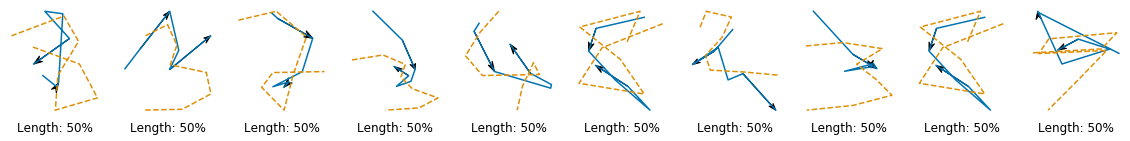

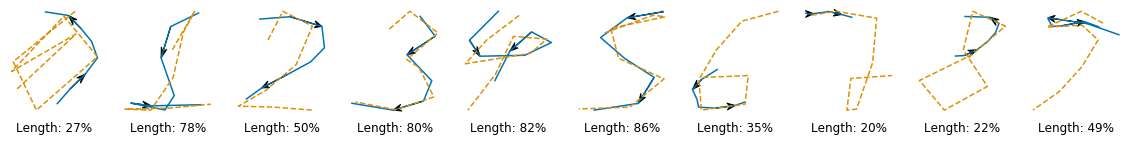

In [15]:
for mode in modes:
    # Subfolder
    subfolder = 'PenDigits-' + mode
    
    # Load data
    shapelets = torch.load(save_dir + '/{}/shapelets.pt'.format(subfolder))
    lengths = torch.load(save_dir + '/{}/lengths.pt'.format(subfolder))
    minimizers = torch.load(save_dir + '/{}/minimizers.pt'.format(subfolder))
    
    # Remap
    shapelets = shapelets[class_map]
    lengths = lengths[class_map]
    minimizers = minimizers[class_map]
    
    # Ready plots
    fig, ax = plt.subplots(1, 10, figsize=(20, 2))
    
    # Plot shapelet and minimizer
    for i in range(10):
        shapelet, minimizer, length = shapelets[i], minimizers[i], lengths[i]
        ax[i].plot(shapelet[:, 0], shapelet[:, 1], label='Learnt shapelet')
        ax[i].plot(minimizer[:, 0], minimizer[:, 1], label='Training set minimizer', ls='--')

        # Add an arrow
        xdata, ydata = shapelet[:, 0], shapelet[:, 1]
        arw_i = 3   # Start index of the arrow
        for arw_i in [1, 5]:
            ax[i].arrow(xdata[arw_i], ydata[arw_i], xdata[arw_i+1]-xdata[arw_i], ydata[arw_i+1]-ydata[arw_i], 
                     length_includes_head=True, head_width=0.2, color='black', overhang=0.4)

        ax[i].set_title('Length: {:.0f}%'.format(100 * length / 7), y=-0.2)

        ax[i].set_xticks([], [])
        ax[i].set_yticks([], [])
        ax[i].axis('off')

    plt.savefig('./figures/PenDigits-{}.png'.format(mode), dpi=300, bbox_inches='tight')